# Example notebook : explain global and local for binary classification

## Load packages

In [1]:
from transparentai.datasets import load_iris
from transparentai.explainer import ModelExplainer

import pickle

## Load data

In [2]:
iris = load_iris()

## Prepare data

In [3]:
target = 'iris plant'
target_value = {'setosa':1, 'versicolor':2, 'virginica':3}
iris[target] = iris[target].replace(target_value)

In [4]:
X, y = iris.drop(columns=target), iris[target]

## Create model

In [5]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

## Create model explainer

In [6]:
feature_names = X.columns
explainer = ModelExplainer(model=clf, X=X, 
                           feature_names=feature_names, model_type='tree',
                           multi_label=True)

## Global explanation

In [7]:
explainer.explain_global(X)

With 150 rows, this function can take a while for a tree explainer.


{0: {'sepal length (cm)': 0.0,
  'sepal width (cm)': 0.0,
  'petal length (cm)': 0.0,
  'petal width (cm)': 0.44333333333333247},
 1: {'sepal length (cm)': 0.0,
  'sepal width (cm)': 0.0,
  'petal length (cm)': 0.1452402845144275,
  'petal width (cm)': 0.3306833348244439},
 2: {'sepal length (cm)': 0.0,
  'sepal width (cm)': 0.0,
  'petal length (cm)': 0.14524027831554398,
  'petal width (cm)': 0.2982916829854251}}

Plot for the 0th class.


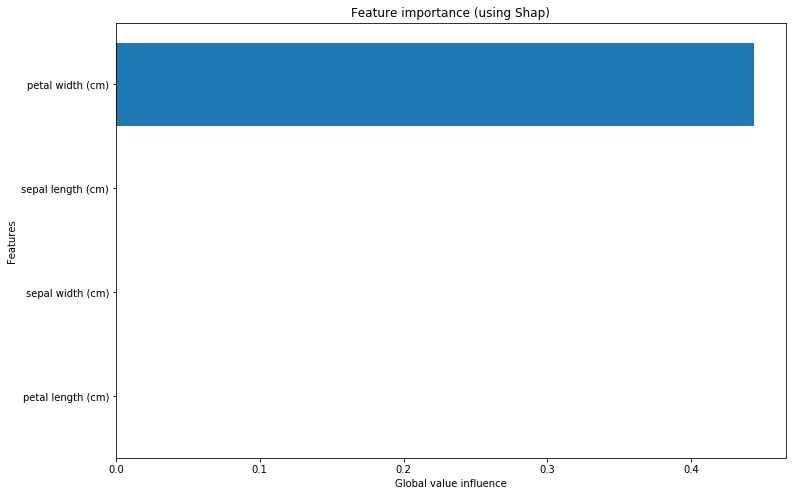

Plot for the 1th class.


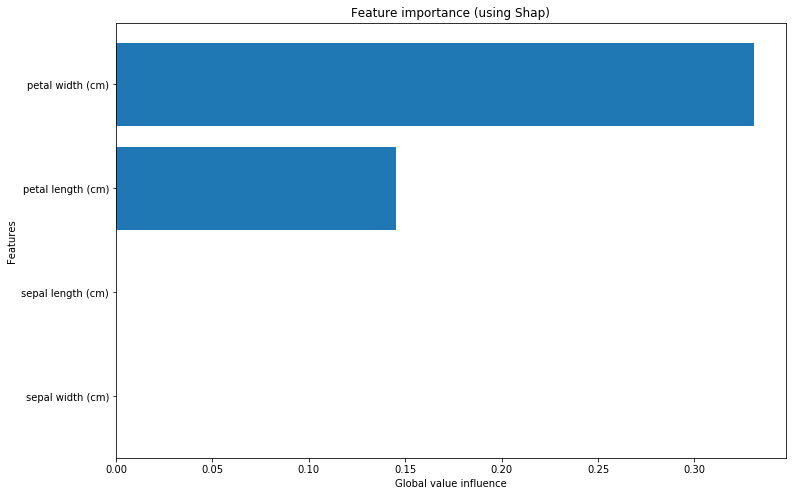

Plot for the 2th class.


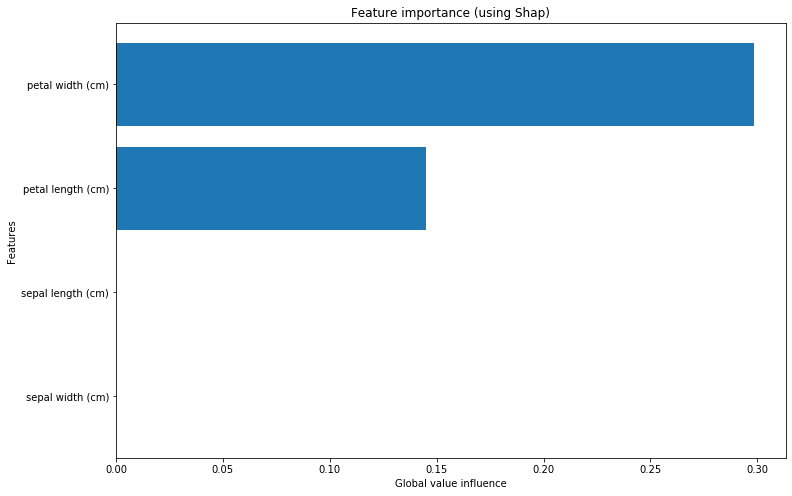

In [14]:
explainer.plot_global_explain()

## Local explanation

In [9]:
one_row = X.iloc[86]
explainer.explain_local(one_row)

{'sepal length (cm)=6.7': [0.0, 0.0, 0.0],
 'sepal width (cm)=3.1': [0.0, 0.0, 0.0],
 'petal length (cm)=4.7': [0.0, 0.16968750864267348, -0.16968750357627868],
 'petal width (cm)=1.5': [-0.33, 0.5186458349227905, -0.18864584842696785]}

Plot for the 0th class probability.


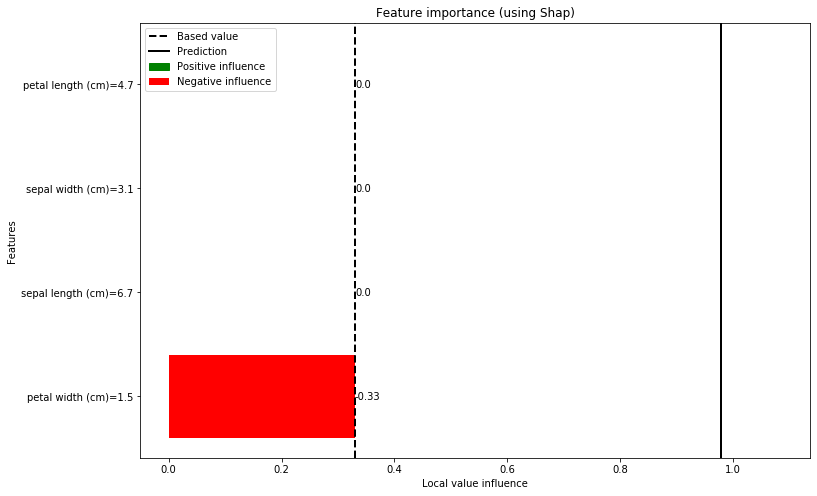

Plot for the 1th class probability.


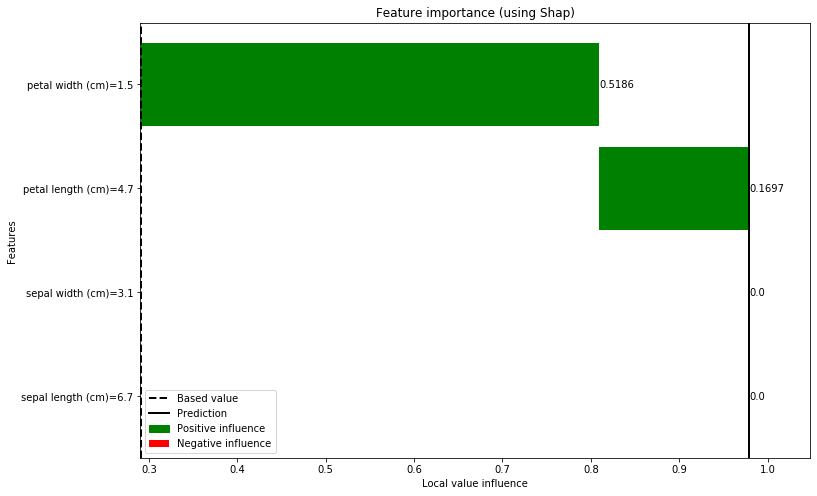

Plot for the 2th class probability.


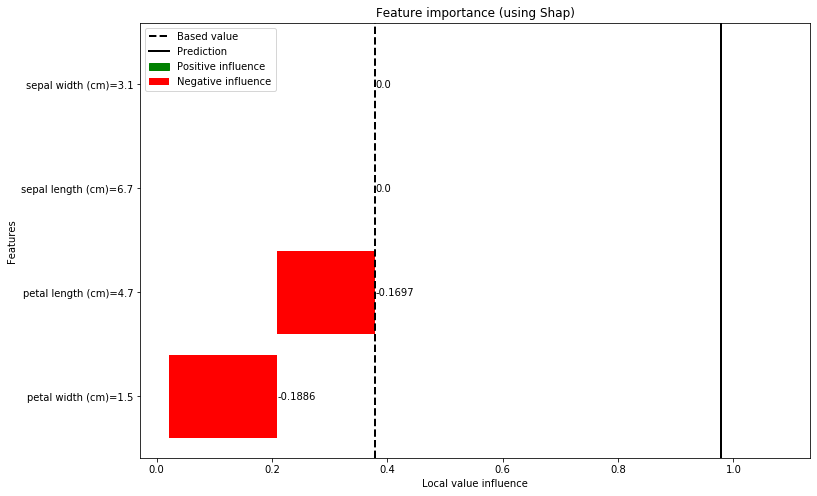

In [12]:
explainer.plot_local_explain(one_row)

## The end.